In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from pylab import rcParams
from statsmodels.tsa.seasonal import STL
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
data=pd.read_csv(r"C:\Users\sudarson.SUDARSON\Downloads\AirPassengers.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [4]:
data.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [5]:
data.shape

(144, 2)

In [6]:
data.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [7]:
data.tail()

,Month,#Passengers
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [8]:
#data.Month=pd.to_datetime(data.Month,format="%Y-%m")

In [9]:
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [10]:
'''c=1
for i in range(0,len(data)):
    x=list(map(int,data.Month[i].split('-')))
    if(x[1]!=c):
        print("error",x[1],c)
    c+=1
    if c==13:
        c=1'''

'c=1\nfor i in range(0,len(data)):\n    x=list(map(int,data.Month[i].split(\'-\')))\n    if(x[1]!=c):\n        print("error",x[1],c)\n    c+=1\n    if c==13:\n        c=1'

In [11]:
#data=pd.DataFrame(data)

In [12]:
#data.index = data.Month

In [13]:
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [14]:
#data=data.drop(columns=["Month"])

In [15]:
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


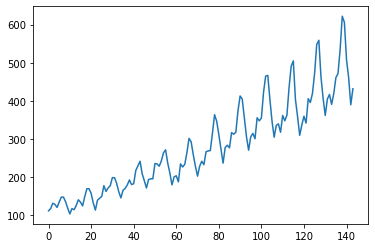

In [16]:
plt.plot(data["#Passengers"])

In [17]:
result = seasonal_decompose(np.array(data["#Passengers"]), model='multiplicative', freq=4)



C:\Users\SUDARS~1.SUD\AppData\Local\Temp/ipykernel_12816/918865270.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(np.array(data["#Passengers"]), model='multiplicative', freq=4)


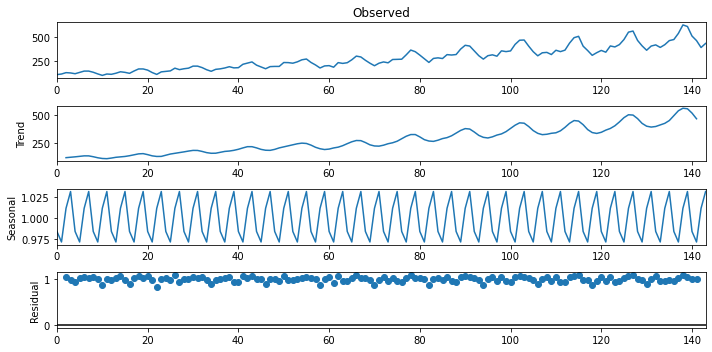

<Figure size 2880x720 with 0 Axes>

In [18]:
rcParams['figure.figsize'] = 10, 5
result.plot()
plt.figure(figsize=(40,10))
plt.show()

In [19]:
'''stl = STL(data, period=12, robust=True)
res_robust = stl.fit()
fig = res_robust.plot()'''

'stl = STL(data, period=12, robust=True)\nres_robust = stl.fit()\nfig = res_robust.plot()'

In [20]:
train,test=train_test_split(data,test_size=12,shuffle=False)

In [21]:
testx

NameError: name 'testx' is not defined

In [ ]:
testx=pd.DataFrame(testx)

In [ ]:
t=trainy[trainx[len(trainx)-1]]

In [ ]:
testx=pd.DataFrame(testx,columns=["Naive"])

In [ ]:
plt.plot(testx.Naive,testy)
plt.plot(train.Month,trainy)

In [ ]:
shift=data.shift(2)

In [ ]:
shift.rolling(12)

In [ ]:
shift=data.iloc[0:12,0:]

In [ ]:
mean_squared_error(shift,test)

In [ ]:
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing, Holt

In [ ]:
ses1=SimpleExpSmoothing(data["#Passengers"])

In [ ]:
alpha = 0.2

In [ ]:
model = ses1.fit(smoothing_level = alpha, optimized = False)

In [ ]:
forcast = model.forecast(3)
forcast

In [ ]:
ax = data.plot(marker = 'o', figsize = (12,8), legend = True)

forcast.plot(ax = ax)

In [ ]:

fit1 = Holt(data["#Passengers"], initialization_method="estimated").fit(smoothing_level=0.8,smoothing_trend=0.2,optimized=False)
fcast1 = fit1.forecast(5).rename("Holt's linear trend")
fit2 = Holt(data["#Passengers"], exponential=True,
            initialization_method="estimated").fit(smoothing_level=0.8,
                                                   smoothing_trend=0.2,
                                                   optimized=False)
fcast2 = fit2.forecast(5).rename("Exponential trend")
fit3 = Holt(data["#Passengers"], damped_trend=True,
            initialization_method="estimated").fit(smoothing_level=0.8,
                                                   smoothing_trend=0.2)
fcast3 = fit3.forecast(5).rename("Additive damped trend")

plt.figure(figsize=(12, 8))
plt.plot(data["#Passengers"], marker="o", color="black")
plt.plot(fit1.fittedvalues, color="blue")
(line1, ) = plt.plot(fcast1, marker="o", color="blue")
plt.plot(fit2.fittedvalues, color="red")
(line2, ) = plt.plot(fcast2, marker="o", color="red")
plt.plot(fit3.fittedvalues, color="green")
(line3, ) = plt.plot(fcast3, marker="o", color="green")
plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])


[]

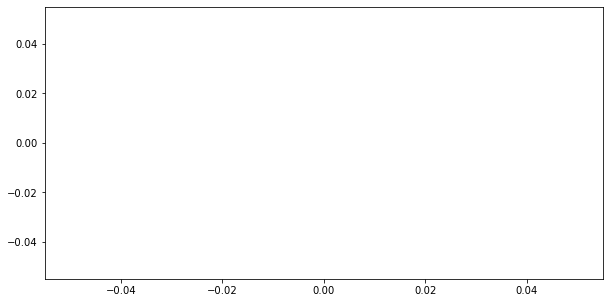

In [25]:
# Importing required libraries
import numpy as np
import pandas as pd
#import matplotlib.pylot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
  
# Read the AirPassengers dataset
airline = pd.read_csv(r"C:\Users\sudarson.SUDARSON\Downloads\AirPassengers.csv",
                       index_col ='Month',
                       parse_dates = True)
  
# Print the first five rows of the dataset
airline.head()
  
# ETS Decomposition
result = seasonal_decompose(airline['#Passengers'],model ='multiplicative')
  
# ETS plot 
plt.plot()

In [ ]:

# To install the library
pip install pmdarima
  
# Import the library
from pmdarima import auto_arima
  
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
  
# Fit auto_arima function to AirPassengers dataset
stepwise_fit = auto_arima(airline['# Passengers'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 12,
                          start_P = 0, seasonal = True,
                          d = None, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True)           # set to stepwise
  
# To print the summary
stepwise_fit.summary()

In [22]:

start = len(train)
end = len(train) + len(test) - 1
  
# Predictions for one-year against the test set
predictions = result.predict(start, end,
                             typ = 'levels').rename("Predictions")
  
# plot predictions and actual values
predictions.plot(legend = True)
test['# Passengers'].plot(legend = True)

AttributeError: 'DecomposeResult' object has no attribute 'predict'